In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from scipy.integrate import quad


In [2]:
# imp: importance of end points. Expressed as ratio between middle vs endpoint weights
def function_x(x, width,maxi, imp):
    w = width/2
    b = math.sqrt(4*math.log(imp))/w
    temp = maxi*(math.e**(-1*(b*(x-w))**2))
    return temp

def function_y(y, h, maxi, i_e, i_m):
    C = maxi/(i_e * i_m)
    a = h/(4*C*(i_e*i_m - 1))
    B = (1 + math.sqrt(1 - (i_e - 1)/(i_e*i_m - 1)))/(2*a)
    A = -1*(B**2/(4*C*(i_e*i_m - 1)))
    return A*y**2 + B*y + C
    
    

In [3]:
function_y(0, 480, 20, 2, 2)

5.0

In [4]:
def print_img(size, imp_x, imp_y_e, imp_y_m, iD, x_sym = True):
    x_s, y_s = size
    maxi = 20
    im = Image.new("RGB", (x_s, y_s))
    pix = im.load()
    for x in range(x_s):
        for y in range(y_s):
            if x_sym:
                temp = function_x(x, x_s, maxi, imp_x) * function_y(y, y_s, maxi, imp_y_e, imp_y_m)
            else:
                temp = function_y(x, x_s, maxi, imp_y_e, imp_y_m) * function_y(y, y_s, maxi, imp_y_e, imp_y_m)
            temp = int(temp*255/(maxi**2))
            pix[x,y] = (temp, temp, temp)

    im.save("test{}.png".format(iD), "PNG")
    img = mpimg.imread('test{}.png'.format(iD))
    plt.imshow(img)

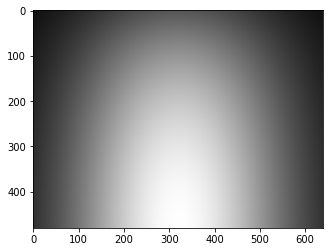

In [5]:
print_img((640,480), 1.5, 3, 1, 0, x_sym = True)